a)	Build and train a KNN Regression model. Vary the parameter K and analyze the results by identifying cases of overfitting and underfitting. Select the optimal value of K and justify your choice.!

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [65]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [66]:
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

Shape of training data: (404, 14)
Shape of testing data: (102, 14)


In [67]:
print(train_data.head())


       CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
0  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666.0   
1   0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307.0   
2   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304.0   
3   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666.0   
4   0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307.0   

   PTRATIO       B  LSTAT  MEDV  
0     20.2  349.48  24.91  12.0  
1     21.0  395.62   8.47  19.9  
2     16.9  362.25   7.83  19.4  
3     20.2    2.52  23.29  13.4  
4     21.0  390.95  11.28  18.2  


In [68]:
print(test_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.09178   0.0   4.05     0  0.510  6.416  84.1  2.6463    5  296.0   
1  0.05644  40.0   6.41     1  0.447  6.758  32.9  4.0776    4  254.0   
2  0.10574   0.0  27.74     0  0.609  5.983  98.8  1.8681    4  711.0   
3  0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873    4  305.0   
4  5.09017   0.0  18.10     0  0.713  6.297  91.8  2.3682   24  666.0   

   PTRATIO       B  LSTAT  MEDV  
0     16.6  395.50   9.04  23.6  
1     17.6  396.90   3.53  32.4  
2     20.1  390.11  18.07  13.6  
3     19.2  390.91   5.52  22.8  
4     20.2  385.09  17.27  16.1  


In [69]:
X_train = train_data.drop('MEDV', axis=1)
y_train = train_data['MEDV']

In [70]:
X_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']


In [71]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 13)
Shape of y_train: (404,)
Shape of X_test: (102, 13)
Shape of y_test: (102,)


In [72]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import seaborn as sns

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64


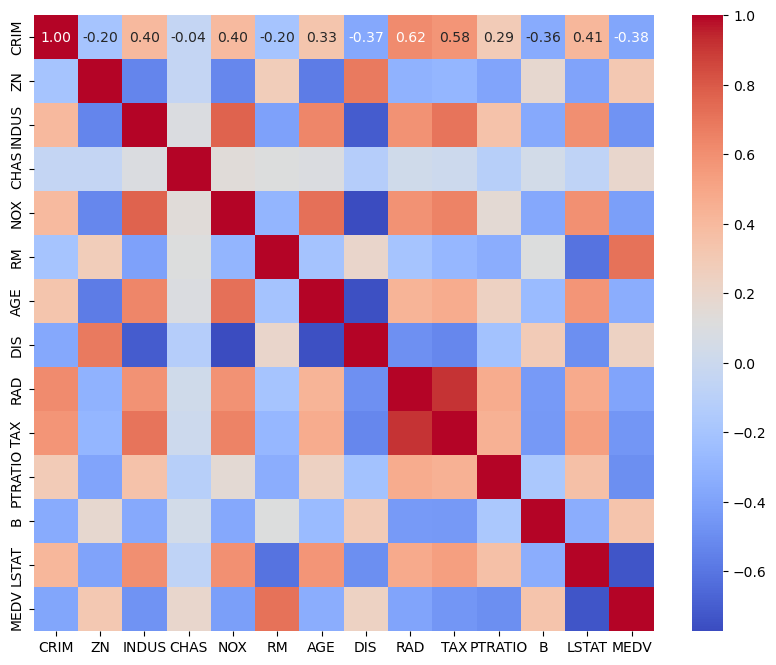

In [73]:
train_df = pd.DataFrame(X_train, columns=train_data.columns[:-1]) 
train_df['MEDV'] = y_train


correlation_matrix = train_df.corr()


print(correlation_matrix['MEDV'].sort_values(ascending=False))


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

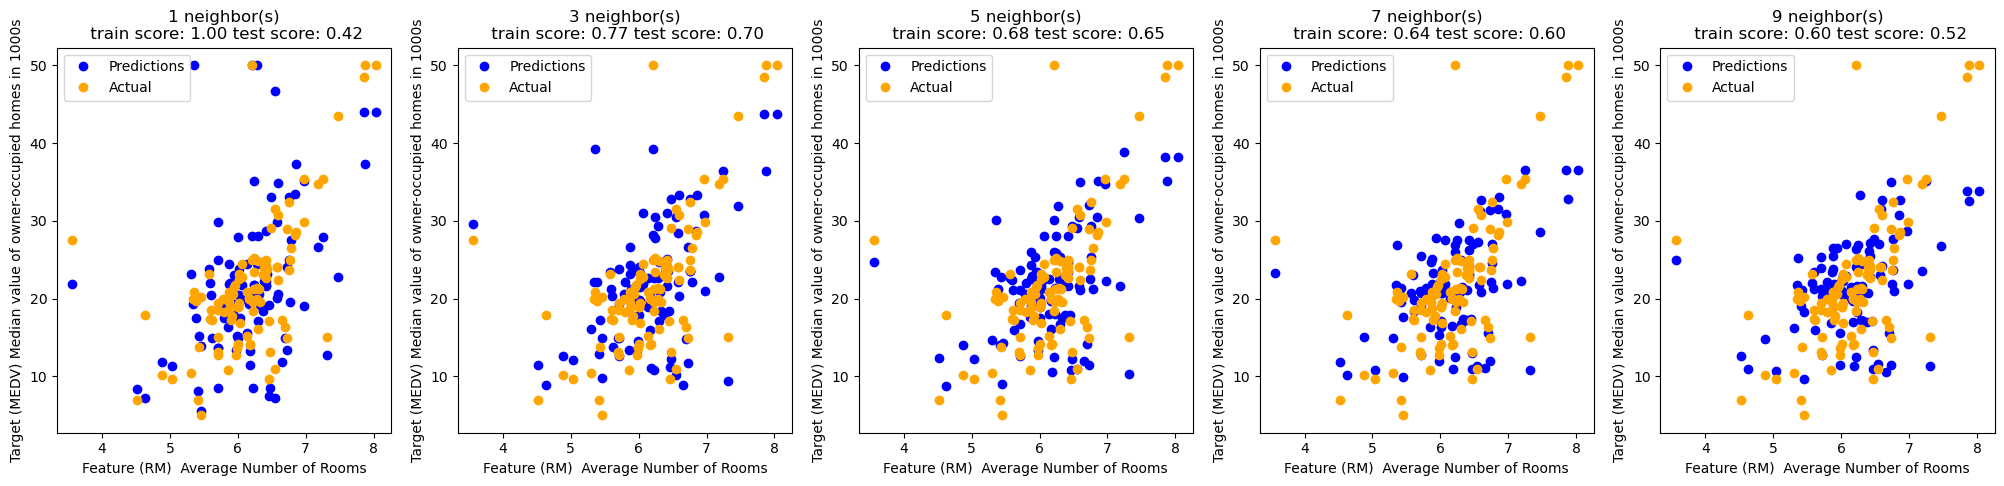

R² score for K=1: 0.42
R² score for K=3: 0.70
R² score for K=5: 0.65
R² score for K=7: 0.60
R² score for K=9: 0.52


In [74]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

r2_scores = []
k_values = [1, 3, 5, 7, 9]

# Define different values of K (number of neighbors)
for n_neighbors, ax in zip(k_values, axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    

    y_pred = reg.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((n_neighbors, r2))
    

    ax.plot(X_test['RM'], y_pred, 'o', label="Predictions", color='blue')
    ax.plot(X_test['RM'], y_test, 'o', label="Actual", color='orange')
    
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature (RM)  Average Number of Rooms")
    ax.set_ylabel("Target (MEDV) Median value of owner-occupied homes in 1000s")
    ax.legend(loc="best")

plt.show()

for k, r2 in r2_scores:
    print(f"R² score for K={k}: {r2:.2f}")

In [75]:
selected_features = ['RM', 'LSTAT']  # Picked two of best correlations to MEDV

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn_selected = KNeighborsRegressor(n_neighbors=3)
knn_selected.fit(X_train_selected, y_train)
y_pred_selected = knn_selected.predict(X_test_selected)

r2_selected = r2_score(y_test, y_pred_selected)
print(f"R² score with selected features: {r2_selected:.2f}")

R² score with selected features: 0.72


In [76]:

knn_all = KNeighborsRegressor(n_neighbors=3)
knn_all.fit(X_train, y_train)
y_pred_all = knn_all.predict(X_test)

r2_all = r2_score(y_test, y_pred_all)
print(f"R² score with all features: {r2_all:.2f}")

R² score with all features: 0.70


b)	Build and train an OLS Regression model. Analyze the results and indicate if the learned model is a good choice for this data. Justify your conclusions.

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression().fit(X_train, y_train)

In [79]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


lr.coef_: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
lr.intercept_: 30.246750993923158


In [80]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.75
Test set score: 0.67


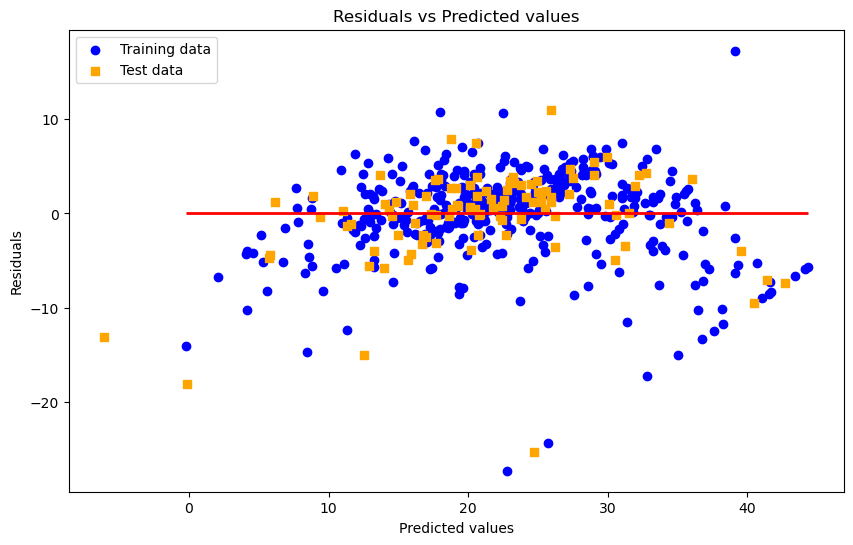

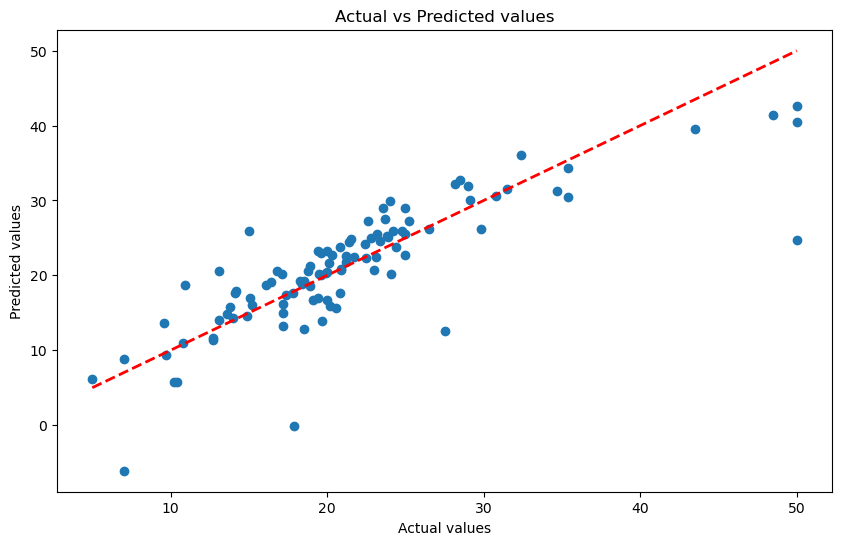

In [81]:

plt.figure(figsize=(10, 6))
y_train_pred = lr.predict(X_train)
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), color='red', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()



c)	Build and train a Ridge Regression model. Vary the constraint parameter and analyze the results by identifying cases of overfitting and underfitting. Select the optimal value of  and justify your choice.